# Homework 5: Hypothesis Testing, Indexing, and Choose Your Own Adventure

Welcome back! 👋

## Reading this week in the Computing Companion 🐶

Last week's reading was Section 4.4 (Booleans) and Chapter 10 (Hypothesis Testing). This week's reading is Chapter 8 (Indexing).

## What's in this homework...

This week's homework assignment has three sections:

* The first section continues our exploration of statistical 📈 hypothesis testing that we encountered during both lecture and lab.

* The second section provides a first opportunity to practice with the concept of indexing. (It's explained here and in Chapter 8) ☝

* The third section offers you a short choose-your-own adventure 🎒 to continue practicing Python foundations _or_ dive a bit deeper and discover genes 👖 in real DNA. Both parts require about the same amount of code-writing, but the first option is _review_ and the second option uses what you've learned so far to make a real discovery: Finding genes!

Finally, please be sure to include a <font color = "green">**contract**</font> for every function that you write. The contract is a comment at the top of the function that explains what the function takes as input and what it returns. This is an important practice when writing code because it allows other people who might be using your code to understand what each function does. We didn't take many points off last week for missing contracts, but our grading rubrics for this week and beyond have points for contracts. 📝 You'll see that we use contracts in the code that we provide in this notebook.



# Section 1: Hypothesis Testing 🔬

## Testing for differences of two means


The first lab experiment that we've worked on this semester has involved testing for antibiotic resistance in the soil microbiomes at the 5Cs' campuses. The randomization test that we used in lecture this week can be repurposed to allow us to test a variety of null hypotheses about the antibiotic resistance data.

In this first part of the homework, you will select a pair of datasets to compare, formulate a scientific question and corresponding null hypothesis, test that hypothesis using the aforementioned randomization test, and then write an interpretation of the test's results (i.e., the *p*-value it produces).

First, here are the datasets comprising of the *percentage* of antibiotic-resistant bacteria found at each site:

<font color="green">**Section 1, Green Beach**</font>

`Sec1_GreenBeach = [6.17, 0.29, 7.24, 0.59, 4.70, 2.42]`

<font color="blue">**Section 1, Chicken Coop**</font>

`Sec1_ChickenCoop = [0.68, 1.93, 0.88, 9.86, 0.28, 5.80]`

<font color="green">**Section 2, Green Beach**</font>

`Sec2_GreenBeach = [0.46, 18.87, 0.00, 0.00, 17.75, 0.05]`

<font color="blue">**Section 2, RDSC**</font>

`Sec2_RDSC = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00]`

<font color="green">**Section 3, Bauer Trees**</font>

`Sec3_BauerTrees = [1.40, 0.00, 0.18, 0.00, 4.26, 0.02]`

<font color="blue">**Section 3, Chicken Coop**</font>

`Sec3_ChickenCoop = [0.00, 6.00, 0.06, 0.35, 0.05, 2.61]`

<font color="green">**Section 4, Seniors**</font>

`Sec4_Seniors = [0.71, 0.00, 0.51, 0.70, 0.26, 0.07]`

<font color="blue">**Section 4, Green Beach**</font>

`Sec4_GreenBeach = [0.00, 0.00, 5.29, 0.20, 0.04, 7.00]`

<font color="green">**Section 5, RDSC West**</font>

`Sec5_RDSCWest = [0.09, 0.31, 5.10, 0.00, 0.53, 0.00]`

<font color="blue">**Section 5, Green Beach**</font>

`Sec5_GreenBeach = [1.30, 0.24, 0.15, 0.00, 3.20, 0.00]`

<font color="green">**Section 6, RDSC West**</font>

`Sec6_RDSCWest = [53.05, 0.03, 3.06, 4.95, 0.79, 23.85]`

<font color="blue">**Section 6, Green Beach**</font>

`Sec6_GreenBeach = [0.66, 0.00, 0.00, 2.00, 1.57, 1.81]`

<font color="green">**Section 7, Green Beach**</font>

`Sec7_GreenBeach = [3.55, 5.00, 0.82, 7.35, 0.00, 0.22]`

<font color="blue">**Section 7, Chicken Coop**</font>

`Sec7_ChickenCoop = [2.20, 2.75, 4.27, 1.46, 5.43, 1.81]`

<font color="green">**Section 8, Construction Site**</font>

`Sec8_ConstructionSite = [0.00, 1.68, 0.00, 0.00, 0.00, 0.00]`

<font color="blue">**Section 8, Chicken Coop**</font>

`Sec8_ChickenCoop = [0.06, 1.04, 0.00, 0.00, 0.00, 2.11]`



**Part 1** Choose any two of the above datasets -- it's fine to choose the two datasets from your lab section or two entirely different ones! Then, write the scientific question and the corresponding null hypothesis.

<font color="SteelBlue">**The scientific question: Is the average antibiotic resistance higher in the soil samples collected from Green Beach or the Chicken Coop for Section 1?**</font>

<font color="SteelBlue">**The null hypothesis: The samples will have equal antibiotic restance.**</font>

**Part 2** It's always a good idea to visualize the data before performing a statistical hypothesis test!

With that in mind, modify (and run) the code cell below to generate an appropriately-labeled box plot of the two datasets that you chose to examine in Part 1.

**You will need to make modifications to lines 15, 17-19, 24-27, and 29.** _Don't forget to change the labels and the title of the plot._

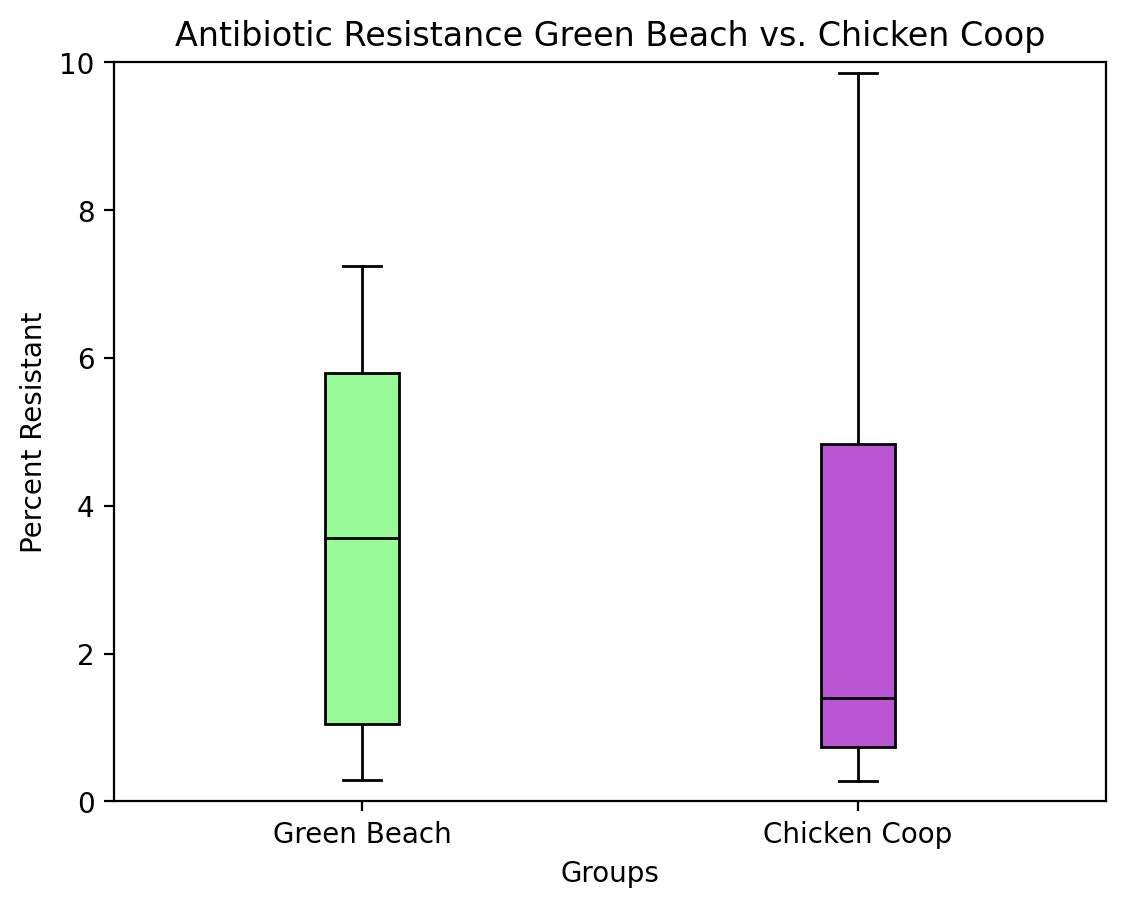

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Takes as input a group list (the groups under consideration), a list of data for those groups,
# and a list of the colors for plotting and produces a box plot.
def boxPlot(groupList, dataList, colorList):
  # create the box plot object
  myPlot = plt.boxplot(dataList, patch_artist=True, tick_labels=groupList)
  # fill boxes with colors (don't worry about this syntax!)
  for patch, color in zip(myPlot['boxes'], colorList):
    patch.set_facecolor(color)
  # draw the medians as black lines (don't worry about this syntax!)
  plt.setp(myPlot['medians'], color='Black')
  # set y-axis limits (lower limit, upper limit)
  plt.ylim(0, 10)
  # create axes labels and title
  plt.xlabel('Groups')
  plt.ylabel('Percent Resistant')
  plt.title('Antibiotic Resistance Green Beach vs. Chicken Coop')

# the list of groups (categorical variable) is defined first;
# the lists of numerical data (a list of lists!) are given by group;
# the list of colors is given by group
groups = ['Green Beach', 'Chicken Coop']
percent_resistant = [[6.17, 0.29, 7.24, 0.59, 4.70, 2.42],
              [0.68, 1.93, 0.88, 9.86, 0.28, 5.80]]
colors = ['PaleGreen', 'MediumOrchid']

boxPlot(groupList = groups, dataList = percent_resistant, colorList = colors)

**Part 3** Next, you'll perform a hypothesis test for the difference of two means using a randomization simulation.

Modify the code cell below to perform the hypothesis test using the two datasets that you chose to examine in Part 1.

**You will need to make modifications to lines 26-28 and line 31.**

In [3]:
import random
import statistics

# Takes two datasets, each a list of numbers, as input. In addition,
# the number of randomization simulation trials, numTrials, is given.
# The function returns a p-value for the hypothesis test.
def twoMeansHypTest(dataset1, dataset2, numTrials):
  nObs1 = len(dataset1)
  obsDiffMean = statistics.mean(dataset1) - statistics.mean(dataset2)
  combinedData = dataset1 + dataset2
  counter = 0
  simDiffMeans = []
  for i in range(numTrials):
    random.shuffle(combinedData) # Shuffle the data!
    # Break up the list into two parts...
    sample1 = combinedData[:nObs1] # This gives us the list of items from the start up to (but not including) position nObs1
    sample2 = combinedData[nObs1:] # This gives us the list from position nObs1 to the end of the list
    sampleDiffMean = statistics.mean(sample1) - statistics.mean(sample2)
    simDiffMeans = simDiffMeans + [ sampleDiffMean ]
    if abs(sampleDiffMean) >= abs(obsDiffMean):
      counter = counter + 1
  pvalue = counter/numTrials
  return pvalue, obsDiffMean, simDiffMeans

Green = [6.17, 0.29, 7.24, 0.59, 4.70, 2.42]
Chicken = [0.68, 1.93, 0.88, 9.86, 0.28, 5.80]

# run the hypothesis test
pvalue, obsResult, simResults = twoMeansHypTest(dataset1 = Green, dataset2 = Chicken, numTrials = 10000)

print("The p-value is:", pvalue)

The p-value is: 0.8485


**Part 4**

Based on the *p*-value that you calculated above (as well as the plot that you generated), what can you conclude about the difference in means between your two datasets?
   
<font color="SteelBlue">**Your conclusion: p-value: 0.8485 - this means that it is likely that the null hypothesis holds true, and that there is likely no difference in antibiotidc resistance.**</font>

## Testing for differences of two proportions

[Chow et al. (2005)](https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/486404) studied two common preventative treaments for acute mountain sickness (AMS). Participants in the study were randomly assigned to one of three treatment groups, received the treatment, and then were taken to an elevation of 3800 m for 24 hours. The researchers recorded whether the participants experienced AMS symptoms during their time at elevation. The outcomes of the study are listed below:

**Placebo:** 8 <font color="Teal">without</font> AMS symptoms, 12 <font color="DeepPink">with</font> AMS symptoms

**Ginkgo biloba:** 6 <font color="Teal">without</font> AMS symptoms, 11 <font color="DeepPink">with</font> AMS symptoms

**Acetazolamide:** 14 <font color="Teal">without</font> AMS symptoms, 6 <font color="DeepPink">with</font> AMS symptoms



**Part 5** Choose any two of the above datasets. Write your scientific question and the corresponding null hypothesis.

<font color="SteelBlue">**The scientific question: Is there a difference between Ginkgo biloba and Acetazolamide in preventing AMS symptoms?**</font>

<font color="SteelBlue">**The null hypothesis: There is no difference between Ginkgo biloba and Acetazolamide in preventing AMS symptoms.**</font>

**Part 6** It's always a good idea to visualize the data before performing a statistical hypothesis test!

With that in mind, modify (and run) the code cell below to generate an appropriately-labeled segmented bar plot of the two datasets that you chose to examine in Part 5.

**You will need to make modifications to lines 13, 17-19, 25-29, and 31.**

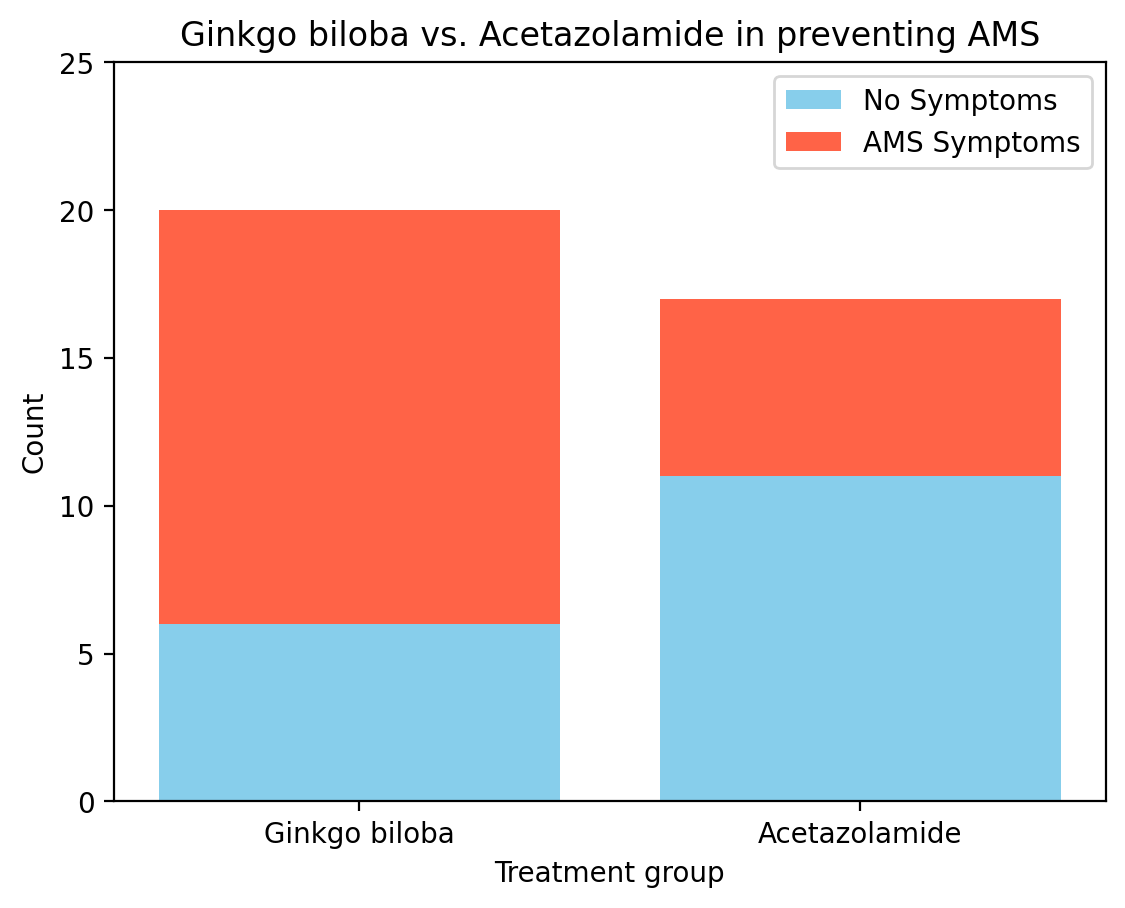

In [7]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Takes as input a group list (the groups under consideration), a list of categories for the outcomes,
# a list of counts for those outcomes, and list of colors for the plot and plots
# a segmented bar plot for those data.
def segmentedBarPlot(groupList, outcomeList, countList, colorList):
  # create the lower portion of the bars (outcome #1)
  plt.bar(groupList, countList[0], color=colorList[0])
  # create the upper portion of the bars (outcome #2)
  plt.bar(groupList, countList[1], bottom=countList[0], color=colorList[1])
  # set y-axis limits (lower limit, upper limit)
  plt.ylim(0, 25)
  # create color legend
  plt.legend(outcomeList)
  # create axes labels and title
  plt.xlabel("Treatment group")
  plt.ylabel("Count")
  plt.title("Ginkgo biloba vs. Acetazolamide in preventing AMS")

# the list of groups (categorical variable #1) is defined first;
# the list of outcomes (categorical variable #2) is defined second;
# the lists of counts (a list of lists!) are given first by outcome and then by group;
# the list of colors is given by outcome
groups = ["Ginkgo biloba", "Acetazolamide"]
outcomes = ["No Symptoms", "AMS Symptoms"]

#Placebo: 8 without AMS symptoms, 12 with AMS symptoms
#Ginkgo biloba: 6 without AMS symptoms, 11 with AMS symptoms
#Acetazolamide: 14 without AMS symptoms, 6 with AMS symptoms

counts = [[6, 11], # uninfected: 12 (control) and 8 (vaccine)
          [14, 6]]  # infected: 2 (control) and 3 (vaccine)
colors = ["SkyBlue", "Tomato"]

segmentedBarPlot(groupList = groups, outcomeList = outcomes, countList = counts, colorList = colors)

**Part 7** Next, you'll perform a hypothesis test for the difference of two proportions using a randomization simulation.

Modify the code cell below to perform the hypothesis test using the two datasets that you chose to examine in Part 5. Please use the symbol `W` to indicate participants without symptoms and the symbol `A` indicate participants with symptoms.

**You will need to make modifications to lines 9, 17, 25-27, and 30.**

In [8]:
import random

# Takes two datasets, each a list of "U"s and "I"s, as input. In addition,
# the number of randomization simulation trials, numTrials, is given.
# The function returns a p-value for the hypothesis test.
def twoPropsHypTest(dataset1, dataset2, numTrials):
  nObs1 = len(dataset1)
  nObs2 = len(dataset2)
  obsDiffProp = dataset1.count("A")/nObs1 - dataset2.count("A")/nObs2
  combinedData = dataset1 + dataset2
  counter = 0
  simDiffProps = []
  for i in range(numTrials):
    random.shuffle(combinedData)
    sample1 = combinedData[:nObs1]
    sample2 = combinedData[nObs1:]
    sampleDiffProp = sample1.count("A")/nObs1 - sample2.count("A")/nObs2
    simDiffProps = simDiffProps + [ sampleDiffProp ]
    if abs(sampleDiffProp) >= abs(obsDiffProp):
      counter = counter + 1
  pvalue = counter/numTrials
  return pvalue, obsDiffProp, simDiffProps


# data from malaria vaccine trial
ginkgo = 6*["W"] + 11*["A"]
ace = 14*["W"] + 6*["A"]

# run the hypothesis test
pvalue, obsResult, simResults = twoPropsHypTest(dataset1 = ginkgo, dataset2 = ace, numTrials = 10000)

print("The p-value is:", pvalue)

The p-value is: 0.0488


**Part 8**

Based on the *p*-value that you calculated above (as well as the plot that you generated), what can you conclude about the difference in proportions between your two datasets?
   
<font color="SteelBlue">**Your conclusion: p-value: 0.0488 - This p value means it is extremely unlikely that our null hypothesis is true, meaning that it is highly likely that Acetazolamide is more effective at preventing AMS symptoms.**</font>

# Section 2: A Short Exploration of Indexing! ☝

We now turn to the topic of indexing which is in your reading for this week.



Recall that both strings and lists are sequences of things. Strings are sequences of symbols and lists are sequences of anything. As such, strings and lists share many things in common. For example, both can be used in `for` loops: We can loop over the symbols in a string and we can loop over the elements in a list. Similarly, we can add two strings together to get a new string and we can add two lists together to get a new list.

Recall that in a string, the first symbol is at _index_ (or "location") 0. The next symbol is at _index_ 1, and so forth. Here is a string with its indices written above it:
<pre>
0 1 2 3 4 5 6 <-- indices
n u t e l l a <-- symbols of the string
</pre>

We can pick out the symbol at a given index using the syntax below.

Note that all is happy until line 9, where we get an error.

In [9]:
myString = "nutella"
print("Symbol at index 0:", myString[0])
print("Symbol at index 1:", myString[1])
print("Symbol at index 2:", myString[2])
print("Symbol at index 3:", myString[3])
print("Symbol at index 4:", myString[4])
print("Symbol at index 5:", myString[5])
print("Symbol at index 6:", myString[6])
print("Symbol at index 7:", myString[7])

Symbol at index 0: n
Symbol at index 1: u
Symbol at index 2: t
Symbol at index 3: e
Symbol at index 4: l
Symbol at index 5: l
Symbol at index 6: a


IndexError: string index out of range

**Part 9** Why does Python complain when we try to look at `myString[7]` in the example above?

<font color = "blue">**Nutella only has 7 characters, meaning index 7 is out of range, since python is zero indexed.** </font>

### The built-in `len` function

Recall that the built-in `len` function takes a string or list as input and returns the length of that string or list.

In [10]:
myString = "nutella"
stringLength = len(myString)
print(stringLength)

7


### Home on the `range` *🐃*

We've seen the built-in `range` function as well. It takes a counting number as input and returns a list of that many numbers. However, it begins at 0, so take a look at what we get...

In [11]:
myList = range(7)
print(myList)

range(0, 7)


**Huh!?!** Python is lazy. 😴 It doesn't want to work too hard. To get it to actually print the contents of the list, we have to tell Python that we want to unpack the range into the actual list:

In [12]:
myList = range(7)
print(list(myList))

[0, 1, 2, 3, 4, 5, 6]


Alternatively, and this is how we've mostly been doing it in class, we can do it this way...

In [13]:
myList = list(range(7)) # Here, we're making sure that range(7) is in list format.
print(myList)

[0, 1, 2, 3, 4, 5, 6]


Now, take a look at the code cell below.

In [14]:
myString = "nutella"
indices = range(len(myString))
print(indices)        # <-- Lazy Python!
print(list(indices))  # <-- add list(...) just to get to print

range(0, 7)
[0, 1, 2, 3, 4, 5, 6]


Or, alternatively...

In [15]:
myString = "nutella"
indices = list(range(len(myString)))
print(indices)        # Now, indices is an actual list...

[0, 1, 2, 3, 4, 5, 6]


Amazing! Look, we got the list of the indices of the 7 letters of `"nutella"`. How? `len(myString)` is the length of `nutella`. That's 7.
`list(range(len(myString)))` is, therefore, the list `[0, 1, 2, 3, 4, 5, 6]`.

Now, take a look at this code and run it. Since we're not actually interested in the list, we can do this...

In [16]:
myString = "nutella"
for index in range(len(myString)):
  print(index, myString[index])

0 n
1 u
2 t
3 e
4 l
5 l
6 a


Although, this also works and you've seen us do this in class and homeworks (unpacking the `range` into a list)...

In [17]:
myString = "nutella"
for index in list(range(len(myString))):
  print(index, myString[index])

0 n
1 u
2 t
3 e
4 l
5 l
6 a


**Part 10**

In your own words, explain:
  1. What is the list `list(range(len(myString)))` in this example. <font color = "blue"> [0, 1, 2, 3, 4, 5, 6]</font>
  2. What values does the variable `index` take as we repeatedly perform the loop in line 2. <font color = "blue">0, 1, 2, 3, 4, 5, 6</font>

### Why bother with indexing?

Imagine that we have two strings, each comprising the DNA sequence of an allele of the same gene. We'd like to determine the number of places where these two alleles differ. For now, we'll assume that the two alleles have the same length, so the only mutations that we're considering are substitutions.

For example, consider the two alleles below. We've put indices above them so that you can the location of each base in the string.

<pre>
0 1 2 3 4 5 <-- indices
A T G G C A <-- allele 1
A C C G C T <-- allele 2
</pre>

Notice that these two alleles differ in three places, at indices 1, 2, and 5.

So we'd like to write a function that takes two strings of the same length and returns the number of indices at which these strings differ.

Stop 🛑 and think about how we would write such a function in Python. Notice that if we start like this...

```python
def differences(allele1, allele2):
  counter = 0
  for symbol in allele1:
```

... we're not going to make any progress! Do you see why?

The reason is that this style of looping is looking at the symbols of `allele1` one-by-one, but it doesn't allow us to look at `allele2` _at the same time_ to compare their bases at the same positions.
_The problem that we're trying to solve is inherently about indices; we want to compare the two strings at their corresponding indices_. **Whenever a problem is about indices, we need to loop over the list of indices.** That means a loop that iterates using `range(...)`.



In [18]:
# Takes two strings of the same length as input and returns
# the total number of INDICES at which they differ.
def differences(allele1, allele2):
  counter = 0  # This is where we will keep count of the number INDICES at which allele1 and allele2 differ
  for index in range(len(allele1)):       # We're assuming that the two alleles have the same length
    if allele1[index] != allele2[index]:  # Check if the two strings have different symbols at the current index
      counter = counter + 1
  return counter

test1 = "ATGGCA"
test2 = "ACCGCT"

result = differences(allele1 = test1, allele2 = test2)
print(test1, "and", test2, "differ at", result, "indices")

ATGGCA and ACCGCT differ at 3 indices


Here's another example of the use of indices.
Our one-eyed alien friends have discovered that English is actually quite similar to their own language except that in their own language they only keep the letters at odd indices. To translate from English to OEA (One-Eyed Alienish), we only keep the letters with odd indices. For example `nutella` is translated as `uel` because, when we look at `nutella` and its indices, the letters at odd indices (1, 3, 5) are the only ones that we keep.
<pre>
0 1 2 3 4 5 6
n u t e l l a
</pre>
To do this, recall that the modulus operator `%` gives the remainder when one counting number is divided by another. Therefore `n % 2` is 0 if `n` is even (no remainder when n divided by 2) and is 1 if `n` is odd (the result of dividing `n` by 2 gives a remainder of 1).

Here's our OEA function. We've included some extra `print` functions so that you can see it in action.

In [19]:
# Takes a string corresponding to an English word as input and returns
# a string corresponding to the translation of that string in OEA.
def OEA(englishWord):
  translation = ""
  for index in range(len(englishWord)):
    print("The current index is:", index)
    if index % 2 == 1:
      print(" that index is odd, so we're adding the symbol ", englishWord[index])
      translation = translation + englishWord[index]
  return translation

test = "nutella"
print("I'm about to call OEA for help")
result = OEA(englishWord = test)
print("The translation of ", test, "is", result)

I'm about to call OEA for help
The current index is: 0
The current index is: 1
 that index is odd, so we're adding the symbol  u
The current index is: 2
The current index is: 3
 that index is odd, so we're adding the symbol  e
The current index is: 4
The current index is: 5
 that index is odd, so we're adding the symbol  l
The current index is: 6
The translation of  nutella is uel


**Part 11** Your turn! We want a function called `zip(string1, string2)` that takes two strings of the same length as input and returns a new string that alternates between the symbols of `string1` and `string2`. For example:
<pre>
zip("wow", "abc")
</pre>
should return `waobwc`. The first symbol comes from `string1`, the next from `string2`, the next from `string1`, and so forth.

To do this, we want to iterate over the _indices_ of the strings. Because the two strings have the same length, you can iterate over `range(len(string1))` and that will give you the list of indices. In the case that `string1` is `"wow"`, it has length 3, and `range(len(string1))` will be the list `[0, 1, 2]`.

Building up a string in this way involves the accumulator paradigm! (Remember 🥪!) We start with a variable -- you choose the name -- that is an empty string.

**For** each _index_, we want to get the symbol of `string1` at that index and the symbol of `string2` at that same index. We then add those two symbols to the accumulator.

Finally, we return the accumulator, which is the string where we've accumulated our result!

Write the `zip(string1, string2)` function in the code cell below.

In [23]:
# Takes two strings and combines them by adding one index of each in alternating order
def zip(string1, string2):
  # Your code here
  output = ""
  for i in range(len(string1)):
    output += string1[i] + string2[i]
  return output







print(zip(string1 = "wow", string2 = "abc"))    # <-- should be waobwc
print(zip(string1 = "ABCD", string2 = "wxyz"))  # <-- should be AwBxCyDz

waobwc
AwBxCyDz


**Part 12**

Returning to DNA, we'd like to have a function that takes two DNA sequences of the same length (e.g., alleles of the same gene that are of the same length) and returns a list of the _indices_ where the two sequences are the same.

This is the accumulator pattern again. 🥪 We start with an empty list. We loop over the _indices_ (the two strings are of the same length, so we can use the length of either string to make that list), and each time we find an index where the two strings match, we add that index to the accumulator list. Finally, we return that accumulator list.



In [26]:
# Takes in two strings of DNA and returns the indexes where the sequences are the same
def matches(DNA1, DNA2):
  # Your code here
  output = []
  for i in range(len(DNA1)):
    if DNA1[i] == DNA2[i]:
      output.append(i)
  return output







test1 = "ATTCG"
test2 = "ACTCC"
print(matches(DNA1 = test1, DNA2 = test2))  # <-- should be the list [0, 2, 3]

[0, 2, 3]


# Section 3: Choose your own adventure 💼

This section is a choose-your-own adventure for Python practice. Please choose **one** of these options:

  * Option 1 is a _review_ of concepts similar to those that were on the first midterm. There are four problems to do there. If you feel that you would benefit from more review of those kinds of problems, this is a great option!
  * Option 2 is a deeper dive that leads you to locate genes in a bacterial genome and discover 💡 what those genes might do!

**The total number of lines of code that you'll write for these two parts is almost identical.** Option 2 is a bit more challenging and uses Python to discover genes. If you're feeling that the coding material from Midterm 1 is not quite solid yet, Option 1 can be a good choice. If you're feeling that the coding material on Midterm 1 was quite solid, we encourage you to work on Option 2.

## Option 1: Review of Concepts

**Option 1, Part 1**

Write a function called `replacePeriod(text, replacer)` that takes two strings as input, `text` and `replacer`. It **return**s a new string that is identical to `text` except that each occurrence of a period `.` is replaced by the string in `replacer`. For example...
```python
print(replacePeriod("I am Sam. Sam I am.", "!!!"))
```
...will print...
```python
I am Sam!!! Sam I am!!!
```
Similarly...
```python
print(replacePeriod("Hello. Look. Bye.", ":^)"))
```
...will print...
```python
Hello:^) Look:^) Bye:^)
```

In [ ]:
# Option 1, Part 1

# Write the contract here
def replacePeriod(text, replacer):
  # Write your code here.

print(replacePeriod(text = "I am Sam. Sam I am.", replacer = "!!!"))
print(replacePeriod(text = "Hello. Look. Bye.", replacer = ":^)"))

**Option 1, Part 2**

In HW4, we saw that a  _palindrome_ is a string that is the same forwards as backwards, such as "radar", "wow", and "elle". It turns out that bacteria have certain regions of their DNA where the DNA is palindromic! (We'll see more about this in a few weeks when we talk about CRISPR.)

We also saw how we could use a function that we wrote called `reverse` that takes a string as input and **return**s the reversal of that string, inorder to check whether a given string is a palindrome.

Now, we look at palindromes in a DNA setting! Recall that, due to complementarity of the DNA bases (`A` pairs with `T` and `C` pairs with `G`), if we are given the DNA string on one strand, then we can determine the string on the complementary strand using the base pairing rule.

Given a DNA string, its _reverse complement_ is obtained by first reversing the string and then identifying its complementary sequence (using the base pairing rule). For instance, the reverse complement of the DNA string `AACGC` is the string `GCGTT`. A DNA string is said to be a _DNA palindrome_ if this string is the same as its reverse complement. For instance, `AACGTT` is a DNA palindrome, while `AACGC` is not a DNA palindrome.

Your job is to write two functions:
* A function called `complement(DNAstring)` that takes a DNA string and returns the string on the complementary strand (in the same direction)

* A function called `saveTheDNAPalindromes(listOfStrings)` that takes a list of DNA strings as input and returns all strings in this list that are DNA palindromes.
For example...
```python
print(saveTheDNAPalindromes(["AACGTT", "CCAA", "TATA"]))
```
...will give us...
```python
['AACGTT', 'TATA']
```

In [ ]:
# Option 1, Part 2

# This provided function takes a string as input and returns the reversal of that string
def reverse(string):
  return string[::-1]

# Write the contract here
def complement(DNAstring):
  # Write your code here

# Write the contract here
def saveTheDNAPalindromes(listOfDNAStrings):
  # Write your code here

# Testing the code
print(reverse(string = "ACTG"))
print(complement(DNAstring = "ACTG"))
print(saveTheDNAPalindromes(listOfDNAStrings = ["AACGTT", "CCAA", "TATA"]))


**Option 1, Part 3**

This problem revisits the idea of helper and main functions.

The `randomWalk` function simulates a SCI 10 professor performing a random walk that starts at 0 and at each iteration takes a step to the left (changes position by -1), stays at the same spot (doesn't change position), _or_ takes a step to the right (changes position by +1). This function returns the final location of the professor at the end of the `numSteps` steps.

Your job is to write the `experiment(numTrials, timesteps)` function that performs `numTrials` of that experiment. After each trial, the ending location for that trial is added to a list that accumulates those ending values. That list of ending locations is then plotted by the provided code in lines 22-25. In addition to adding the necessary code in that function, you should also choose appropriate strings for the title, x-axis label, and y-axis label.

In [ ]:
# Option 1, Part 3
import matplotlib.pyplot as plt
import random

# Provided code that performs one trial of a random walk for
# the given number of timesteps. Returns the position of the walker
# at the end of the trial.
def randomWalk(numSteps):
  position = 0
  for i in range(numSteps):
    direction = random.choice([-1, 0, 1])
    position = position + direction
  return position

# Write the contract here
def experiment(numTrials, timesteps):
  # Write your code here
  # The list that you build here should be called endingLocations since that is
  # what is plotted.

  plt.title("???")      # Add an appropriate title for the graph
  plt.xlabel("???")     # Add an appropriate label for the x-axis
  plt.ylabel("???")     # Add an appropriate lavel for the y-axis
  plt.hist(endingLocations)             # plot histogram of end locations

experiment(numTrials = 1000, timesteps = 10)

**Option 1, Part 4**

This part has two functions that you'll need to write.

  * The `punctuationScore(string)` function takes a string as input and returns a score for that string. If the string contains a `!`, the score of that string is 42 - no matter what other symbols are in that string or how many `!`'s there are. Otherwise, the score is equal to the total number of periods and question marks in the string (the number `.` and `?` symbols in the string).
  * The `scoreWordList(listOfWords)` function takes a list of strings as input and **return**s a list of scores, one score for each corresponding word in the list `listOfWords`. This function should "call" the `punctuationScore` function for help!

For example, when we run...
```python
print(punctuationScore("nothing here"))
print(punctuationScore("I am Sam. Am I Sam?"))
print(punctuationScore("omg!?!?!!!!"))
print(scoreWordList(["nothing here", "I am Sam. Am I Sam?", "omg!?!?!!!!", "hello!?"]))
```
... we should get...
```python
0
2
42
[0, 2, 42, 42]
```


In [ ]:
# Option 1, Part 4

# Write the contract here
def punctuationScore(string):
  # Write your code here

# Write the contract here
def scoreWordList(listOfWords):
  # Write your code here

print(punctuationScore(string = "nothing here"))
print(punctuationScore(string = "I am Sam. Am I Sam?"))
print(punctuationScore(string = "omg!?!?!!!!"))
print(scoreWordList(listOfWords = ["nothing here", "I am Sam. Am I Sam?", "omg!?!?!!!!", "hello!?"]))

**Option 1: Part 5**

First, recall from your reading in Chapter 8 that you can get a section of a string, called a _slice_, using this notation:

In [ ]:
myString = "Hello earthlings!"
print(myString[0:3]) # the slice of the string from index 0 to index 2 (one before 3)
print(myString[2:5]) # the slice of the string from index 2 to index 4 (one before 5)

It's very handy that you can never "get hurt" slicing! That, is, if you try to slice beyond the end of a string, Python will just give you as much as it can.

In [ ]:
myString = "nutella"
print(myString[3:100]) # 100 is way beyond that last index, but Python is fine with this.

Your task is to write a function called `countStartCodons(DNAstring)` that takes a DNA string as input and **returns** the number of start codons ("ATG") in that string.

In [ ]:
# Write the contract here
def countStartCodons(DNAstring):
  # Write your code here

# The code below will test your function

test1 = "AATGCCCATGA"
result1 = countStartCodons(DNAstring = test1) # Should be 2
print("The number of start codons in test1 is", result1)
test2 = "ATGAATGACCATGCCATGGATGA"
result2 = countStartCodons(DNAstring = test2) # Should be 5
print("The number of start codons in test2 is", result2)

The number of start codons in test1 is 2
The number of start codons in test2 is 5


## Option 2: Gene 👖 Finding 🔍

In this part, you'll write your own code for discovering genes in DNA! You'll then use your program to locate likely genes in _Salmonella typhimirium_, a bacterium that causes typhoid in mice and causes GI infections in humans.

Once you've located the likely genes, you'll use the BLAST database from the National Center for Biotechnology Information to determine if those genes are similar to genes in other bacteria that have been studied. This can shed light 💡on the function of the genes that you found and may also indicate where those genes came from (e.g., horizontal gene transfer from another species).


### A quick aside on handy Python features

There are two Python features that will be useful here.



First, recall from your reading in Chapter 8 that you can get a section of a string, called a _slice_, using this notation:

In [27]:
myString = "Hello earthlings!"
print(myString[0:3]) # the slice of the string from index 0 to index 2 (one before 3)
print(myString[2:5]) # the slice of the string from index 2 to index 4 (one before 5)

Hel
llo


It's very handy that you can never "get hurt" slicing! That, is, if you try to slice beyond the end of a string, Python will just give you as much as it can.

In [28]:
myString = "nutella"
print(myString[3:100]) # 100 is way beyond that last index, but Python is fine with this.

ella


Another useful feature is that the `range` function can be given 3 inputs, indicating the start, the end, and the step. Take a few moments to read through the examples below.

In [29]:
print(list(range(3, 10, 2)))
print(list(range(42, 100, 5)))

[3, 5, 7, 9]
[42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97]


In [30]:
DNA = "TAGAAACCCGGG"
print(list(range(0, len(DNA), 3)))

[0, 3, 6, 9]


In [31]:
# Oh so useful for getting codons!
for i in range(0, len(DNA), 3):
  print(DNA[i:i+3])

TAG
AAA
CCC
GGG


### ORFs (they're not aliens!)

Throughout this discussion, we'll refer to the concept of an _open reading frame (ORF)_. That's a sequence of DNA that (1) begins with a start codon (ATG), (2) has some number of codons that follow it (remember, each codon is a sequence of exactly three bases), (3) and ends with a stop codon (TAG, TAA, or TGA). (Note that we're looking at codons in DNA rather than in mRNA, so we're seeing T's rather than U's.)

For example, consider this sequence with the indices written above. (The stacked 1 0 means 10, etc.)
<pre>
0 1 2 3 4 5 6 7 8 9 1 1 1 1 1
                    0 1 2 3 4
A T G A A T G A C T A A C C C
</pre>
Notice that this sequence begins with a start codon. There is a TGA beginning at index 1, which looks like a stop codon. But it is not "in frame" with the start codon because it is not a multiple of 3 bases past the start codon. That is, it's not aligned with the start codon that starts at index 0. Similarly, there is a TGA starting at index 5, but this too is not in frame with the ATG start codon at index 0. The "in frame" stop codon in this case is TAA which begins at index 9. So, the open reading frame (ORF) begins at index 0 and and ends at index 11 in this example.

Perhaps surprisingly, not every ORF encodes a gene. In random sequences of bases, we may find ORFs by chance. _However_ ORFs that are particularly long are good candidates for genes. This leads us to one strategy for finding genes: Find ORFs that are longer than what you'd expect to find by chance. They are good candidates for being protein-coding genes! 🧬 👖

### Option 2, Part 1: `restOfORF`

Recall that an open reading frame (ORF) is the stretch of a DNA sequence between a start codon (with the sequence ATG) and the next in frame stop codon (TAG, TAA, or TGA). Recall that by _in frame_ we mean that it is in a position that is a multiple of 3 bases away.

Your first challenge is to write a function that finds the open reading frame given a sequence that begins with the start codon "ATG".

In the code cell below, write a function called `restOfORF(DNA)` that takes as input a DNA sequence. It assumes that this DNA sequence begins with a start codon "ATG". It then finds the next in frame stop codon, and **returns** the ORF from the start to that stop codon. The sequence that is returned should include the start codon but **not** the stop codon. If there is no in frame stop codon, `restOfORF` should assume that the reading frame extends through the end of the sequence and simply return the entire sequence. (This is why we don't include the stop codon in the output.)

To this end, you will need to determine if a particular codon is a stop codon. Imagine that you have a string named `codon` and you wish to test if it is a stop codon, that is one of "TAG", "TAA", or "TGA". You could do this:

```python
if codon == 'TAG' or codon == 'TAA' or codon == 'TGA':
   blah, blah, blah
```
Or, better yet, you could use our handy friend `in` this way:
```python
if codon in ['TAG', 'TAA', 'TGA']:
   blah, blah, blah
```
Here are some examples of `restOfORF`

```python
print(restOfORF("ATGTGAA"))
'ATG'
print(restOfORF("ATGAGATAAG"))
'ATGAGA'
print(restOfORF("ATGAGATAGG"))
'ATGAGA'
print(restOfORF("ATGAGATAGGGGTAA"))
'ATGAGA'
print(restOfORF("ATGAAATT"))
'ATGAAATT'
```
Note that in the last example there is no in frame stop codon, so we got back the whole string.

This function will use our beloved accumulator pattern 🥪! _Our solution uses around 8 lines of code._


In [41]:
# Code cell for the restOfORF function
# Returns all codons until stop
def restOfORF(DNA):
  output = ""
  for i in range(0,len(DNA), 3): # skip 3
    codon = DNA[i:i+3]
    if codon in ['TAG', 'TAA', 'TGA']:
      return output
    output += codon
  return output

print(restOfORF(DNA = "ATGTGAA"))         # should be ATG
print(restOfORF(DNA = "ATGAGATAAG"))      # should be ATGAGA
print(restOfORF(DNA = "ATGAGATAGG"))      # should be ATGAGA
print(restOfORF(DNA = "ATGAGATAGGGGTAA")) # should be ATGAGA
print(restOfORF(DNA = "ATGAAATT"))        # should be ATGAATT

ATG
ATGAGA
ATGAGA
ATGAGA
ATGAAATT


### Option 2, Part 2: `oneFrame`

Next, write a function called `oneFrame(DNA)` that takes a DNA string as input. It searches the string from left-to-right, beginning at index 0, in steps of three bases (codons!). When it encounters a start codon ("ATG"), **it calls `restOfORF`** on the slice of the string beginning at that codon to get back an ORF. That ORF is added to an `output` list. This is repeated until we've traversed the entire DNA string. In the end, we return the `output` list of all of the ORFs that were found.

Consider this example sequence:
<pre>
0 1 2 3 4 5 6 7 8 9 1 1 1 1 1 1 1 1 1 1 2
                    0 1 2 3 4 5 6 7 8 9 0
A A T G C C A T G T G A A T G C C C T A A
</pre>
We start at index 0 and see `AAT`. The slice `DNA[0:3]` is not a start codon, so we move on to index 3 and the slice `DNA[3:6]` where we see `GCC`. That's also not a start codon, so we move ahead to index 6 where the next slice of length 3 is `ATG`, a start codon!

Here's an example of this function in action. (Remember, we don't include the stop codon in the output.)

```python
print(oneFrame("AATGCCATGTGAATGCCCTAA"))
['ATG', 'ATGCCC']
```
Note that the first 'ATG' did not not get returned here. This is because that ATG starts at index 1, which not in the frame beginning at index 0 that `oneFrame` is searching. (Later, when we do gene finding, we will search those other frames by additional calls to `oneFrame` in the other two reading frames - one beginning at index 1 and one beginning at index 2).

Here's another example of `oneFrame`:
```python
print(oneFrame("ATGCCCATGGGGAAATTTTGACCC"))
['ATGCCCATGGGGAAATTT', 'ATGGGGAAATTT']
```

_Our solution is around 6 lines of code._

In [44]:
# Code cell for the oneFrame function
# returns all codons until stop
def oneFrame(DNA):
  output = []
  i = 0
  while i < len(DNA) - 2:
    codon = DNA[i:i+3]
    if codon == 'ATG': # find start
      output.append(restOfORF(DNA[i:]))
    i += 3
  return output

print(oneFrame(DNA = "AATGCCATGTGAATGCCCTAA"))
print(oneFrame(DNA = "ATGCCCATGGGGAAATTTTGACCC"))

['ATG', 'ATGCCC']
['ATGCCCATGGGGAAATTT', 'ATGGGGAAATTT']


### Option 2, Part 3: `findORFsOneStrand`

Our next step is to write a function `findORFsOneStrand(DNA)` that will identify all the ORFs in the DNA and return them as a list. If there are none, it should return an empty list.

Once again, this task is made easier by making use of functions that we have already written. `findORFsOneStrand` should **call** `oneFrame` in each of the three possible reading frames of the sequence. It should then combine all of the ORFs found in each frame and **return** them. (You can use slicing here! Note that `DNA` is the first reading frame. `DNA[1:]` slices off the first base, so it's shifted to the next reading frame, etc.)

```python
print(findORFsOneStrand("ATGGGATGAATTAACCATGCCCTAA"))
['ATGGGA', 'ATGCCC', 'ATGAAT']
print(findORFsOneStrand("GGAGTAAGGGGG"))
[]
```

_This function can be written in one line of code, but you might write as many as four lines of code._

In [45]:
# Write your findORFs(DNA) function here
def findORFsOneStrand(DNA):
  return oneFrame(DNA) + oneFrame(DNA[1:]) + oneFrame(DNA[2:])

print(findORFsOneStrand(DNA = "ATGGGATGAATTAACCATGCCCTAA"))
print(findORFsOneStrand(DNA = "GGAGTAAGGGGG"))

['ATGGGA', 'ATGCCC', 'ATGAAT']
[]


### Option 2, Part 4: `reverseComplement`

Recall that DNA comes as a pair of strands. Each strand is read in 5' to 3' order. If the top strand is 5' to 3' from left-to-right then the complementary strand will be 5'-to-3' right to left.

For example, here are complementary strands with their 5' to 3' orientations indicated.
<pre>
5' ATGCC 3'
3' TACGG 5'
</pre>

For convenience, we will always represent DNA strings from 5' to 3' left-to-right. So, we would write the top strand in the example above as "ATGCC" and the bottom strand as "GGCAT".

The `reverseComplement` function takes a DNA string in 5' to 3' order and returns its reverse complement in 5' to 3' order. Write the `reverseComplement` function below. _Our solution is around 5 lines of code._


For convenience, here is a little syntax trick to reverse a string.

In [46]:
myString = "nutella"
newString = myString[::-1] # Strange syntax returns the reversal of the string!
print(newString)

alletun


In [49]:
# This is provided - you wrote it before!
def complement(base):
  if base == "A":
    return "T"
  elif base == "T":
    return "A"
  elif base == "C":
    return "G"
  else:
    return "C"

# Returns the reversed complements of the DNA sequence
def reverseComplement(DNA):
  DNAr = DNA[::-1]
  output = ""
  for i in DNAr:
    output += complement(i)
  return output


print(reverseComplement(DNA = "ATGCC")) # Should be GGCAT

GGCAT


### Option 2, Part 5: `findORFsBothStrands`

Next write a function called `findORFsBothStrands(DNA)` that searches both the forward and reverse complement strands for ORFs and returns a list with all the ORFs found.

For example:
```python
print(findORFsBothStrands('ATGAAACAT'))
['ATGAAACAT', 'ATGTTTCAT']
```

_This function can be done in 1-3 lines of code._ We will call `findORFOneStrand` on the forward strand and again on the reverse complement.

In [51]:
# Write your findORFsBothStrands(DNA) function here
def findORFsBothStrands(DNA):
  return findORFsOneStrand(DNA) + findORFsOneStrand(reverseComplement(DNA))

print(findORFsBothStrands(DNA = 'ATGAAACAT'))

['ATGAAACAT', 'ATGTTTCAT']


### Option 2, Part 6: Locating likely genes

We're now at our main function, the `geneFinder`! Our `geneFinder(DNA, threshold)` function takes as input a DNA sequence and a number called `threshold` and returns the list of all ORFs in the DNA (on both forward and reverse complement strands) whose length is at least the `threshold` value.

_Our solution is around 6 lines of code._

In [55]:
# Contract goes here
def geneFinder(DNA, threshold):
  output = []
  orfs = findORFsBothStrands(DNA)
  for i in orfs:
    if len(i) >= threshold:
      output.append(i)
  return output

print(geneFinder(DNA = "ATGAAACAT", threshold = 9) ) # Should be ['ATGAAACAT', 'ATGTTTCAT']
print(geneFinder(DNA = "ATGTAATTACCCGGGCCCCAT", threshold = 12)) # Should be ['ATGGGGCCCGGG']

['ATGAAACAT', 'ATGTTTCAT']
['ATGGGGCCCGGG']


### Real data!

The code frame below defines a variable called `X73525` which contains one strand of part of the _Salmonella typhimirium_ genome. Run it. Then, continue on to test your `geneFinder` on this data below.

In [56]:
X73525 = "GGATCCGACAGGGAAAATCGTTGAGCGTTTTACCCCTGAAGTGGCGCCGATTAGCGAAGAACGCGTTATTGATGTCGCACCGCCGTCTTACGCTTCACGCGTTGGCGTCCGTGAACCGCTGATTACCGGTGTGCGCGCGATTGACGGGTTATTGACCTGTGGCGTAGGCCAGCGAATGGGCATTTTTGCCTCCGCAGGATGCGGTAAGACCATGCTGATGCATATGCTGATCGAGCAAACGGAGGCGGATGTCTTTGTTATCGGTCTTATCGGTGAACGAGGCCGTGAGGTCACTGAATTCGTGGATATGTTGCGCGCTTCGCATAAGAAAGAAAAATGCGTGCTGGTTTTTGCCACTTCCGATTTCCCCTCGGTCGATCGCTGCAATGCGGCGCAACTGGCGACAACCGTAGCGGAATATTTTCGCGACCAGGGAAAACGGGTCGTGCTTTTTATCGATTCCATGACCCGTTATGCGCGTGCTTTGCGAGACGTGGCACTGGCGTCGGGAGAGCGTCCGGCTCGTCGAGGTTATCCCGCCTCCGTATTCGATAATTTGCCCCGCTTGCTGGAACGCCCAGGGGCGACCAGCGAGGGAAGCATTACTGCCTTTTATACGGTACTGCTGGAAAGCGAGGAAGAGGCGGACCCGATGGCGGATGAAATTCGCTCTATCCTTGACGGTCACCTGTATCTGAGCAGAAAGCTGGCCGGGCAGGGACATTACCCGGCAATCGATGTACTGAAAAGCGTAAGCCGCGTTTTTGGACAAGTCACGACGCCGACACATGCTGAACAGGCATCTGCCGTGCGTAAATTAATGACGCGTTTGGAAGAGCTCCAGCTTTTCATTGACTTGGGAGAATATCGTCCTGGCGAAAATATCGATAACGATCGGGCGATGCAGATGCGGGATAGCCTGAAAGCCTGGTTATGCCAGCCGGTAGCGCAGTATTCATCCTTTGATGACACGTTGAGCGGTATGAATGCATTCGCTGACCAGAATTAAAGTATTGCAGCGGCGCTGTACGGTATTTCATTCACAGTGTGAGTCGATATTACTTCGCTATCAGGATGAGGACCGCGGGCTGCAGGCCGAGGAGGAGGCGATCCTTGAACAAATAGCGGGTCTGAAATTGTTATTAGATACGCTGCGTGCAGAAAACAGACAGCTCAGTCGTGAGGAAATTTATACGTTATTACGTAAGCAGTCTATTGTTCGCCGGCAGATAAAAGATTTAGAACTCCAGATTATACAAATTCAGGAAAAACGGAGCGAGCTGGAAAAGAAAAGGGAAGAGTTTCAGAAAAAAAGTAAATATTGGTTGCGCAAAGAAGGGAACTATCAACGCTGGATAATCCGTCAGAAAAGATTCTATATCCAGCGAGAGATACAGCAGGAAGAGGCCGAGTCAGAGGAGATAATTTAATGGGCGATGTGTCAGCTGTCAGTTCATCCGGGAACATTTTACTGCCGCAGCAGGATGAGGTTGGCGGTTTATCAGAAGCATTAAAAAAAGCGGTGGAAAAACATAAGACAGAATATTCCGGTGATAAAAAAGATCGCGACTATGGCGATGCTTTCGTAATGCATAAAGAAACGGCTTTACCGTTATTACTGGCGGCATGGCGACATGGCGCGCCAGCGAAATCAGAACATCACAATGGCAACGTTTCTGGTCTGCATCATAACGGAAAAAGCGAACTCAGGATTGCTGAAAAACTGTTGAAAGTCACTGCTGAAAAATCTGTCGGTTTGATCTCTGCGGAGGCCAAAGTAGATAAATCCGCAGCGTTGCTATCGTCTAAAAATAGGCCGTTAGAAAGCGTAAGCGGTAAAAAATTATCTGCTGATTTAAAAGCTGTGGAATCCGTTAGTGAAGTAACCGATAACGCCACGGGAATCTCTGACGATAATATCAAGGCATTGCCTGGGGATAATAAAGCCATCGCGGGCGAAGGCGTTCGTAAAGAGGGCGCGCCGCTGGCGCGGGATGTCGCACCTGCCCGAATGGCCGCAGCCAATACCGGTAAGCCTGAAGATAAAGATCATAAAAAGGTTAAAGATGTTTCTCAGCTTCCGCTGCAACCAACCACTATCGCCGATCTTAGCCAATTAACCGGCGGCGATGAAAAAATGCCTTTAGCGGCGCAATCAAAGCCGATGATGACTATTTTTCCCACTGCCGATGGCGTGAAAGGAGAGGATAGCTCGCTGACTTACCGTTTTCAGCGCTGGGGAAATGACTATTCCGTCAATATTCAGGCGCGGCAAGCAGGGGAGTTTTCGTTAATACCGTCAAATACGCAGGTTGAACATCGTTTGCATGATCAATGGCAAAACGGTAATCCCCAGCGCTGGCACCTGACGCGAGACGATCAACAAAATCCGCAGCAGCAACAGCACAGACAGCAATCTGGCGAGGAGGATGACGCCTGATGTCATTGCGTGTGAGACAGATTGATCGTCGCGAATGGCTATTGGCGCAAACCGCGACAGAATGCCAGCGCCATGGCCGGGAAGCGACGCTGGAATATCCGACGCGACAGGGAATGTGGGTTCGGTTGAGCGATGCAGAAAAACGGTGGTCGGCCTGGATTAAACCTGGGGACTGGCTTGAGCATGTCTCTCCCGCTCTGGCTGGGGCGGCGGTTTCTGCTGGCGCTGAGCACCTGGTCGTTCCCTGGCTTGCTGCAACAGAGCGACCGTTTGAGTTGCCCGTGCCGCATTTGTCCTGTCGGCGTTTATGCGTAGAGAACCCCGTACCGGGAAGCGCGCTGCCGGAAGGGAAATTGTTGCACATTATGAGCGATCGGGGCGGCCTGTGGTTTGAGCATCTTCCTGAACTGCCTGCAGTCGGGGGCGGCAGGCCGAAAATGCTGCGTTGGCCGTTGCGCTTTGTAATCGGTAGCAGTGATACGCAGCGTTCGTTGCTGGGCCGAATCGGGATCGGAGATGTACTCCTGATTCGTACTTCCCGTGCGGAAGTTTATTGCTACGCGAAAAAGTTAGGTCATTTCAACCGTGTTGAAGGGGGAATTATTGTGGAAACGTTAGATATTCAACATATCGAAGAAGAAAATAATACAACTGAAACTGCAGAAACTCTGCCTGGCTTGAATCAATTGCCCGTCAAACTGGAATTTGTTTTGTATCGTAAGAACGTTACCCTCGCCGAACTCGAAGCCATGGGGCAGCAACAGCTATTATCACTGCCGACCAATGCTGAACTTAACGTTGAAATTATGGCGAATGGTGTTTTGCTGGGTAATGGCGAACTGGTACAGATGAATGACACCTTAGGCGTTGAGATCCATGAATGGCTGAGCGAGTCTGGTAATGGGGAATGATATCTCATTAATTGCCTTACTGGCATTTTCCACCCTGTTGCCATTTATTATTGCGTCAGGAACCTGTTTCGTTAAATTTTCTATTGTATTTGTCATGGTGCGTAACGCCCTGGGATTACAGCAGATACCTTCAAATATGACGCTTAACGGCGTCGCATTGCTGCTTTCTATGTTTGTTATGTGGCCCATAATGCATGATGCCTACGTCTATTTTGAGGACGAAGATGTCACCTTTAATGATATTTCATCATTAAGTAAACACGTTGATGAAGGTCTGGATGGTTATCGCGATTATCTGATCAAATATTCAGATCGCGAGTTAGTTCAGTTTTTTGAAAACGCGCAACTGAAGCGTCAGTATGGAGAAGAGACCGAGACGGTAAAGCGTGACAAAGATGAAATTGAAAAACCTTCAATATTTGCGTTATTACCTGCTTATGCGCTGAGCGAAATAAAAAGCGCGTTTAAAATTGGTTTTTATCTTTATTTGCCCTTTGTCGTCGTCGACCTGGTGGTATCCAGCGTGCTACTGGCGCTGGGGATGATGATGATGAGTCCGGTGACGATATCTACACCTATTAAGCTGGTGCTTTTTGTCGCGCTTGATGGCTGGACCTTACTGTCTAAGGGATTGATATTACAGTATATGGACATTGCAACATGACATCATTACGAGACGGGATAGTTAAATGGATGATTTAGTGTTTGCAGGTAATAAGGCGCTCTATCTTGTTTTGATCCTGTCAGGGTGGCCGACGATTGTCGCAACGATTATCGGCCTCCTGGTAGGGTTATTCCAGACGGTAACGCAATTACAGGAACAGACGCTGCCTTTTGGCATTAAATTACTTGGCGTGTGTTTATGCTTGTTTTTACTGTCTGGCTGGTATGGCGAAGTTTTACTCTCTTACGGGCGTCAGGTGATATTCCTGGCGTTGGCTAAGGGGTAAAAAATGTTTTACGCGTTGTACTTTGAAATTCATCACCTGGTTGCGTCTGCGGCGCTAGGGTTTGCTCGCGTGGCGCCGATTTTTTTCTTCCTGCCGTTTTTGAATAGCGGGGTATTAAGCGGTGCGCCGAGAAACGCCATTATCATCCTGGTGGCATTGGGAGTATGGCCGCATGCATTGAACGAGGCGCCGCCGTTTTTATCGGTGGCGATGATCCCGTTAGTTCTGCAAGAAGCGGCGGTAGGCGTCATGCTGGGCTGTCTGCTGTCATGGCCTTTTTGGGTTATGCATGCGCTGGGTTGTATTATCGATAACCAGCGAGGGGCAACGCTAAGTAGTAGTATCGATCCGGCAAACGGTATTGATACCTCGGAAATGGCTAATTTCCTGAATATGTTTGCCGCTGTCGTTTATTTACAAAACGGCGGTCTGGTCACGATGGTTGACGTGTTAAATAAAAGCTATCAGCTATGCGATCCGATGAACGAGTGCACGCCTTCATTACCGCCGCTATTAACGTTTATTAATCAGGTGGCTCAAAACGCCTTGGTTCTGGCCAGTCCGGTGGTATTAGTGCTGTTGCTGTCAGAAGTATTCCTGGGTTTATTGTCGCGCTTTGCTCCGCAAATGAACGCTTTTGCGATTTCACTGACGGTAAAAAGCGGTATTGCCGTTTTAATTATGCTGCTTTATTTCTCTCCGGTACTACCGGACAATGTACTGCGACTCTCTTTCCAGGCCACAGGGTTAAGCAGTTGGTTTTACGAGCGAGGGGCGACGCATGTCCTCGAATAAAACAGAAAAACCGACTAAAAAACGGCTGGAAGACTCCGCTAAAAAAGGCCAGTCATTTAAAAGTAAAGATCTCATTATCGCCTGCCTGACGCTGGGAGGAATTGCCTATCTGGTGTCGTATGGCTCATTTAATGAGTTTATGGGGATAATTAAGATCATTATTGCGGATAATTTTGATCAGAGCATGGCTGACTACAGTTTGGCCGTTTTTGGGATAGGGTTAAAATATCTGATTCCATTTATGCTGCTCTGCTTAGTGTGTTCCGCATTACCGGCGTTATTACAGGCCGGTTTTGTGCTGGCGACAGAAGCATTAAAGCCTAATTTATCGGCGTTAAACCCGGTAGAAGGGGCAAAAAAACTTTTTAGTATGCGCACGGTTAAAGATACGGTCAAAACCCTACTGTATCTCTCATCCTTTGTGGTGGCCGCCATCATTTGCTGGAAGAAATATAAGGTTGAAATCTTTTCTCAGCTAAATGGCAATATTGTAGGTATTGCCGTCATTTGGCGTGAACTTCTCCTCGCATTGGTATTAACTTGCCTTGCTTGCGCATTGATTGTCTTATTATTGGATGCTATTGCGGAATATTTCCTGACCATGAAAGATATGAAAATGGATAAGGAAGAAGTGAAGCGTGAAATGAAGGAGCAGGAAGGGAACCCAGAGGTTAAATCTAAAAGACGTGAAGTTCATATGGAAATTCTGTCTGAACAGGTGAAATCTGATATTGAAAACTCACGCCTGATTGTTGCCAACCCCACGCATATTACGATCGGGATTTATTTTAAACCCGAATTGATGCCGATTCCGATGATCTCGGTGTATGAAACGAATCAGCGCGCACTGGCCGTCCGCGCCTATGCGGAGAAGGTTGGCGTACCTGTGATCGTCGATATCAAACTGGCGCGCAGTCTTTTCAAAACCCATCGCCGTTATGATCTGGTGAGTCTGGAAGAAATTGATGAAGTTTTACGTCTTCTGGTTTGGCTGGAAGAGGTAGAAAACGCGGGCAAAGACGTTATTCAGCCACAAGAAAACGAGGTACGGCATTGAGCCGCGTAAGGCAGTAGCGATGTATTCATTGGGCGTTTTTTGAATGTTCACTAACCACCGTCGGGGTTTAATAACTGCATCAGATAAACGCAGTCGTTAAGTTCTACAAAGTCGGTGACAGATAACAGGAGTAAGTAATGGATTATCAAAATAATGTCAGCGAAGAACGTGTTGCGGAAATGATTTGGGATGCCGTTAGTGAAGGCGCCACGCTAAAAGACGTTCATGGGATCC"

This a pretty long DNA sequence. Check how long it is!

In [57]:
print(len(X73525))

6387


### Option 2, Part 7: Testing your `geneFinder` on the _Salmonella typhimirium_ X73535 sequence

Now, in the code cell below, run your `geneFinder` on the `X73525` sequence with different threshold lengths. When the `threshold` is 100, you'll probably find many ORFs. As it gets longer (try a number of different `threshold` values), you'll find fewer ORFs.

In [58]:
# test1
length = 100
test = geneFinder(DNA = X73525, threshold = length)
print("The number of ORFs found of length", length, "or more is", len(test))
print(test)

print()
print()
print("NOW USING A FOR LOOP...")

lengthList = [100,300,500,700,900,1100]
for length in lengthList:
  test = geneFinder(DNA = X73525, threshold = length)
  print("The number of ORFs found of length", length, "or more is", len(test))

The number of ORFs found of length 100 or more is 96
['ATGCGTGCTGGTTTTTGCCACTTCCGATTTCCCCTCGGTCGATCGCTGCAATGCGGCGCAACTGGCGACAACCGTAGCGGAATATTTTCGCGACCAGGGAAAACGGGTCGTGCTTTTTATCGATTCCATGACCCGTTATGCGCGTGCTTTGCGAGACGTGGCACTGGCGTCGGGAGAGCGTCCGGCTCGTCGAGGTTATCCCGCCTCCGTATTCGA', 'ATGTCATTGCGTGTGAGACAGATTGATCGTCGCGAATGGCTATTGGCGCAAACCGCGACAGAATGCCAGCGCCATGGCCGGGAAGCGACGCTGGAATATCCGACGCGACAGGGAATGTGGGTTCGGTTGAGCGATGCAGAAAAACGGTGGTCGGCCTGGATTAAACCTGGGGACTGGCTTGAGCATGTCTCTCCCGCTCTGGCTGGGGCGGCGGTTTCTGCTGGCGCTGAGCACCTGGTCGTTCCCTGGCTTGCTGCAACAGAGCGACCGTTTGAGTTGCCCGTGCCGCATTTGTCCTGTCGGCGTTTATGCGTAGAGAACCCCGTACCGGGAAGCGCGCTGCCGGAAGGGAAATTGTTGCACATTATGAGCGATCGGGGCGGCCTGTGGTTTGAGCATCTTCCTGAACTGCCTGCAGTCGGGGGCGGCAGGCCGAAAATGCTGCGTTGGCCGTTGCGCTTTGTAATCGGTAGCAGTGATACGCAGCGTTCGTTGCTGGGCCGAATCGGGATCGGAGATGTACTCCTGATTCGTACTTCCCGTGCGGAAGTTTATTGCTACGCGAAAAAGTTAGGTCATTTCAACCGTGTTGAAGGGGGAATTATTGTGGAAACGTTAGATATTCAACATATCGAAGAAGAAAATAATACAACTGAAACTGCAGAAACTCTGCCTGGCTTGAATCAATTGCCCGTCAAACTGGAATTTGTTTTGTATCGTAAGAA

How many ORFs did you find of length...
  * 100 or more: <font color = "blue">96 ORFs</font>
  * 300 or more: <font color = "blue">44 ORFs</font>
  * 500 or more: <font color = "blue">26 ORFs</font>
  * 700 or more: <font color = "blue">13 ORFs</font>
  * 900 or more: <font color = "blue">4 ORFs</font>
  * 1100 or more: <font color = "blue">0 ORFs</font>


### Option 2, Part 8: Discovery!

Take a quick look at the code cell below. It has a list called `aminos` of the 20 amino acids (one symbol per amino) and the stop codon `|`. The second list, called `codons` is the list of all codons. This pair of lists serves as a codon translation table! The function `codonToAmino` takes a codon as input and uses these tables to return the corresponding amino acid (or stop codon symbol).
Finally, the function `ORFToProtein` takes an ORF as input (such as an ORF found by your `geneFinder` function) and returns the sequence of amino acids (the protein) that correspond to it.

Take a few minutes to look at how this works. It uses techniques that you know and love ♥.

In [59]:
aminos = ['F','L','I','M','V','S','P','T','A','Y',
      '|','H','Q','N','K','D','E','C','W','R',
      'G']

codons = [['TTT', 'TTC'],
          ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
          ['ATT', 'ATC', 'ATA'],
          ['ATG'],
          ['GTT', 'GTC', 'GTA', 'GTG'],
          ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
          ['CCT', 'CCC', 'CCA', 'CCG'],
          ['ACT', 'ACC', 'ACA', 'ACG'],
          ['GCT', 'GCC', 'GCA', 'GCG'],
          ['TAT', 'TAC'],
          ['TAA', 'TAG', 'TGA'],
          ['CAT', 'CAC'],
          ['CAA', 'CAG'],
          ['AAT', 'AAC'],
          ['AAA', 'AAG'],
          ['GAT', 'GAC'],
          ['GAA', 'GAG'],
          ['TGT', 'TGC'],
          ['TGG'],
          ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
          ['GGT', 'GGC', 'GGA', 'GGG']]

def codonToAmino(codon):
  for i in range(len(codons)):
    if codon in codons[i]:
      return aminos[i]
  return ""

def ORFToProtein(ORF):
  protein = ""
  for i in range(0, len(ORF), 3):
    codon = ORF[i:i+3]
    if len(codon) < 3:
      return protein
    else:
      protein = protein + codonToAmino(codon = codon)
  return protein

# Test it
print(ORFToProtein(ORF = "ATGCCCAAATAG")) # We left the stop codon on here so that you can see the | when we translate

MPK|


Now, we'll call your `geneFinder` on the _Salmonella typhimirium_ sequence `X73525` with a large threshold of 1000. That's quite long and likely to be a gene rather than a random ORF. (How did we choose 1000? There's more on that below if you're interested.)

Run the code cell below to find all of the ORFs in the `X73525` sequence and convert them to protein sequences.

In [60]:
orfList = geneFinder(DNA = X73525, threshold = 1000)
print("Found ", len(orfList), "ORFs")
for orf in orfList:
  print(ORFToProtein(ORF = orf))

Found  2 ORFs
MSSNKTEKPTKKRLEDSAKKGQSFKSKDLIIACLTLGGIAYLVSYGSFNEFMGIIKIIIADNFDQSMADYSLAVFGIGLKYLIPFMLLCLVCSALPALLQAGFVLATEALKPNLSALNPVEGAKKLFSMRTVKDTVKTLLYLSSFVVAAIICWKKYKVEIFSQLNGNIVGIAVIWRELLLALVLTCLACALIVLLLDAIAEYFLTMKDMKMDKEEVKREMKEQEGNPEVKSKRREVHMEILSEQVKSDIENSRLIVANPTHITIGIYFKPELMPIPMISVYETNQRALAVRAYAEKVGVPVIVDIKLARSLFKTHRRYDLVSLEEIDEVLRLLVWLEEVENAGKDVIQPQENEVRH
MGDVSAVSSSGNILLPQQDEVGGLSEALKKAVEKHKTEYSGDKKDRDYGDAFVMHKETALPLLLAAWRHGAPAKSEHHNGNVSGLHHNGKSELRIAEKLLKVTAEKSVGLISAEAKVDKSAALLSSKNRPLESVSGKKLSADLKAVESVSEVTDNATGISDDNIKALPGDNKAIAGEGVRKEGAPLARDVAPARMAAANTGKPEDKDHKKVKDVSQLPLQPTTIADLSQLTGGDEKMPLAAQSKPMMTIFPTADGVKGEDSSLTYRFQRWGNDYSVNIQARQAGEFSLIPSNTQVEHRLHDQWQNGNPQRWHLTRDDQQNPQQQQHRQQSGEEDDA


Finally, we'll discover what these genes do.

   1. First, open a browser window at go to the [BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastp&PAGE_TYPE=BlastSearch&BLAST_SPEC=&LINK_LOC=blasttab&LAST_PAGE=blastp) database operated by the National Institutes of Health.
   2. Next, copy the first protein sequence above into the big white box at the upper left of the BLAST page.
   3. Go to the bottom of that page and click "BLAST".
   4. This is a **HUGE** database, so it may take about 30 seconds for the database to respond.
   5. When BLAST is done, it will take you to a new page. Scroll down to the section labeled "Sequences producing significant alignments". You'll see all of the similar genes that BLAST found. Just look at the first one. In the first column, it will tell you something about the gene and the species in which it was found.

Try this for the second sequence as well. Then, you can use a web search to learn just a bit about what comes up in that description.

<font color = "blue">Both results were matched to SPI-1 Type III secretion system proteins, which is Salmonella. Salmonella is a bacteria that causes food poisoning and is commonl found in uncooked chicken and eggs.   </font>

### **Optional:** How did we choose 1000?

This may be a great place to 🛑

However, if you're keen to go even deeper, the next short bit explores the question:
"How do we decide what length is large enough for an ORF to be a candidate gene?"

To help answer that question, we'll use another _randomized experiment_! (We've gotten quite used to using randomization to make discoveries, compute _p_-values, etc.)

Specifically, we'll scramble our DNA and find the longest ORF (on both strands) in that random scramble. By repeating this process a sufficiently large number of times (e.g., 100 times), we can get a sense of the longest ORF we would find in random sequences. We can then choose our threshold for gene finding to be "somewhat longer" than that threshold.

To that end, the code provided below randomly scrambles a given DNA sequence. Try it out!

In [ ]:
import random

# Takes a list of symbols as input and returns a string that is the concatenation of those symbols
def collapse(L):
   output = ""      # This is our initial output string
   for s in L:      # for each string in the list...
      output = output + s    #... construct a new output string
   return output    # ... and return the final output string

# Include a contract comment
def scramble(DNA):
  DNAlist = list(DNA)               # Expand the DNA string into a list
  random.shuffle(DNAlist)           # Shuffle/scramble the bases in the list
  backToString = collapse(L = DNAlist)  # Turn the list back into a string
  return backToString

# Test scramble multiple times!
print(scramble(DNA = "AAATTTCCCGGG"))


First, you'll need a simple helper function, which we'll call `maxLength`, that takes a list of strings as input and returns the length of the longest string in that list.

In [ ]:
def maxLength(myList):
  maxL = 0
  for string in myList:
    if len(string) > maxL:
      maxL = len(string)
  return maxL

print(maxLength(myList = ["yum", "nutella", "alien", "sci10"]))

7


Now, you'll write a function called `longestORFScramble` that takes as input a `DNA` string and a number of `trials`. This function performs `numTrials` iterations of this process:
   * Keep track of the length of the longest ORF seen so far (it starts at 0)
   * Scramble the DNA (using the provided `scramble` function)
   * Get the list of ORFs on both strands of that DNA sequence (using `findORFsBothStrands`)
   * Find the length of the longest ORF in that list (using the `maxLength`)
   * If that length is longer than the length of the longest ORF seen so far, update the length of the longest ORF seen so far
   * Return the length of the longest ORF seen over all of the trials

In [ ]:
# Contract here
def longestORFScramble(DNA, numTrials):
  # Your code here

longestORFScramble(DNA = X73525, numTrials = 100)

732

The number that you got tells us how long a longest random ORF might be. We chose a threshold of 1000 when we looked for genes above because it is "somewhat larger" than this number. This still begs the question of what "somewhat longer" should be, but we now have some intuition about how these randomization experiments can guide us in choosing threshold values.

## Time to submit!

Congratulations! We've come a long way in these first five homework assignments. You've now seen almost all of the Python features that we'll need for the rest of the semester. From now on, we'll be using these Python tools to gain deeper insights into biological phenomena.